## <span style="color:blue;">Requirements</span>

#### Realistic Use Case: Sentiment Analysis of Product Reviews

Developing a model with the provided dataset holds significant importance across various industries, including media, social media, and business sectors. This model plays a big role in upholding the credibility of information disseminated online by efficiently detecting and combatting the proliferation of misinformation. Analysts, data scientists, and machine learning experts leverage the model to devise algorithms for automatically identifying and categorizing false news. Additionally, fact-checkers and journalists utilize these algorithms to authenticate news pieces prior to publication. Crucial data elements such as news headlines, URLs, sources, and publication dates are inputted into the model. Through continuous batch or real-time analysis, the model identifies potential inaccuracies for further human scrutiny. Its predictions serve as crucial alerts, enabling media outlets and social media platforms to promptly verify or remove deceptive content, thus curbing its dissemination.ip", and "no-flip"

##### The provided labels represent different levels of truthfulness or accuracy of news articles:
1. FALSE: Articles that are entirely fabricated or contain significant inaccuracies, deliberately misleading the audience.
2. barely-true: Articles that contain some elements of truth but are mostly inaccurate or misleading. The information presented may be distorted or taken out of context.
3. mostly-true: Articles that are mostly accurate but may contain minor inaccuracies or exaggerations.
4. half-true: Articles that present information that is partially accurate but also contains significant omissions or distortions.
5. pants-fire: Articles that are not only false but also absurd or outrageous, often intended to deceive and manipulate.
6. TRUE: Articles that are verified to be accurate and based on factual information.
7. full-flop: Articles that were initially presented as true but later proven to be entirely false.
8. half-flip: Articles that were initially presented as partially true but later proven to be mostly false.
9. no-flip: Articles that remain consistently accurate throughout scrutiny or investigation, without any significant inaccuracies or distortions.

##### Classes:
1. News Headline (Text):
    - Description: The headline or main piece of information extracted from various news articles.
    - Type: Text (string)

2. Link of News (Text):
    - Description: The URL or link to the original news article from which the headline was extracted.
    - Type: Text (string)

3. Source (Categorical):
    - Description: The author or source of the news headline.
    - Type: Categorical (string)

4. Date (Date):
    - Description: The date when the piece of information is posted and was analyzed by the fact-checkers.
    - Type: Date

#### <span style="color:blue;">Discussion of prediction errors.</span>

In the context of the provided multiclass classification problem with various truthfulness labels (TRUE, mostly-true, half-true, barely-true, FALSE, pants-fire, full-flop, half-flip, no-flip), it's crucial to consider the implications of different types of prediction errors.

Given the nature of the problem, where the goal is to identify and combat misinformation, some prediction errors may be more detrimental than others. For instance, predicting "FALSE" when the true label is "TRUE" or any other degree of truthfulness (mostly-true, half-true, barely-true) would be considered a severe error. This false negative error could result in misinformation being allowed to spread unchecked, undermining the credibility of the platform or media outlet.

Similarly, predicting "TRUE" or any degree of truthfulness when the true label is "FALSE" or "pants-fire" would also be highly undesirable. This false positive error may lead to the dissemination of false information, eroding trust in the platform or media outlet's content moderation efforts.

Therefore, in this particular use case, false negatives and false positives for classes indicating misinformation (e.g., FALSE, pants-fire) are especially problematic and should be minimized. While all errors are significant, prioritizing the reduction of false negatives and false positives for misinformation classes can help mitigate the spread of false information and uphold the integrity of the platform or media outlet.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import turicreate as tc

In [2]:
# Load the dataset
df = pd.read_csv('Fake-Real-News.csv')
df

,News_Headline,Link_Of_News,Source,Stated_On,Date,Label
0,Says Osama bin Laden endorsed Joe Biden,https://www.politifact.com/factchecks/2020/jun...,Donald Trump Jr.,"June 18, 2020","June 19, 2020",FALSE
1,CNN aired a video of a toddler running away fr...,https://www.politifact.com/factchecks/2020/jun...,Donald Trump,"June 18, 2020","June 19, 2020",pants-fire
2,Says Tim Tebow “kneeled in protest of abortion...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 12, 2020","June 19, 2020",FALSE
3,“Even so-called moderate Democrats like Joe Bi...,https://www.politifact.com/factchecks/2020/jun...,Paul Junge,"June 10, 2020","June 19, 2020",barely-true
4,"""Our health department, our city and our count...",https://www.politifact.com/factchecks/2020/jun...,Jeanette Kowalik,"June 14, 2020","June 18, 2020",TRUE
...,...,...,...,...,...,...
9955,Says the Obama administration plans to reduce ...,https://www.politifact.com/factchecks/2013/jun...,Michael McCaul,"June 5, 2013","June 21, 2013",barely-true
9956,"The Foreign Intelligence Surveillance Court ""i...",https://www.politifact.com/factchecks/2013/jun...,Barack Obama,"June 17, 2013","June 21, 2013",pants-fire
9957,"""In the past four years, (the U.S. Senate) has...",https://www.politifact.com/factchecks/2013/jun...,Jack Kingston,"May 2, 2013 i","June 21, 2013",mostly-true
9958,"On immigration reform, Marco Rubio ""all along ...",https://www.politifact.com/factchecks/2013/jun...,Dana Rohrabacher,"June 16, 2013","June 20, 2013",barely-true


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9960 entries, 0 to 9959
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   News_Headline  9960 non-null   object
 1   Link_Of_News   9960 non-null   object
 2   Source         9960 non-null   object
 3   Stated_On      9960 non-null   object
 4   Date           9960 non-null   object
 5   Label          9960 non-null   object
dtypes: object(6)
memory usage: 467.0+ KB


#### <span style="color:blue;">Data Cleaning</span>

In [4]:
# Drop duplicate headlines while keeping the first occurrence
df_cleaned = df.drop_duplicates(subset='News_Headline', keep='first')

In [5]:
# Drop the 'Stated_On' column
df_cleaned = df.drop(columns=['Stated_On'])

In [6]:
# Create a Turi Create SFrame from the pandas DataFrame
sf = tc.SFrame(df_cleaned)

In [7]:
# make a list of stopwords
stopwords = tc.text_analytics.stop_words()

In [8]:
# This function cleans a single text.
def clean_text(text):
    # remove html tags
    text = re.sub('<.{1,4}>', '', text)
    
    # remove punctuation 
    text = re.sub('[^\w^\s\n]', ' ', text)
    
    # remove numbers
    text = re.sub("\d", "", text)
    
    # make everything lowercase
    text = text.lower()
    
    # remove words with one to two characters
    text = re.sub('\\b\w{1,2}\\b', '', text)
    
    # remove stopwords
    for word in stopwords:
        text = re.sub('\\b' + word + '\\b', '', text)
    
    return text

In [9]:
# applying the clean_text_with_stopwords() function to each row of the SFrame
sf['Clean_News_Headline'] = sf['News_Headline'].apply(clean_text)
sf['Clean_Source'] = sf['Source'].apply(clean_text)

Using default 16 lambda workers.

To maximize the degree of parallelism, add the following code to the beginning of the program:

"turicreate.config.set_runtime_config('TURI_DEFAULT_NUM_PYLAMBDA_WORKERS', 24)"

Note that increasing the degree of parallelism also increases the memory footprint.

In [10]:
# counting words and adding word-count dictionary to SFrame
sf['Clean_News_Headline'] = tc.text_analytics.count_words(sf['Clean_News_Headline'])
sf['Clean_Source'] = tc.text_analytics.count_words(sf['Clean_Source'])

In [11]:
# Function to sum word counts in a dictionary
def sum_word_counts(word_count_dict):
    total_count = 0
    for count in word_count_dict.values():
        total_count += count
    return total_count

# Apply the function to sum word counts and store the total count
sf['News_Headline'] = sf['Clean_News_Headline'].apply(sum_word_counts)
sf['Source'] = sf['Clean_Source'].apply(sum_word_counts)

# Select only the columns you want to keep
columns_to_keep = ['Clean_News_Headline', 'Clean_Source', 'Label', 'News_Headline','Source']
sf = sf[columns_to_keep]

# Display the modified SFrame
sf

Clean_News_Headline,Clean_Source,Label,News_Headline,Source
"{'biden': 1.0, 'joe':1.0, 'endorsed': 1.0, ...","{'trump': 1.0, 'donald':1.0} ...",FALSE,6.0,2.0
"{'trump': 1.0, 'cnn':1.0, 'voted': 1.0, ...","{'trump': 1.0, 'donald':1.0} ...",pants-fire,16.0,2.0
"{'model': 1.0,'american': 1.0, 'fans': ...","{'posts': 1.0,'facebook': 1.0} ...",FALSE,11.0,2.0
"{'years': 1.0, 'gross':1.0, 'state': 1.0, ...","{'junge': 1.0, 'paul':1.0} ...",barely-true,18.0,2.0
"{'year': 1.0, 'crisis':1.0, 'racism': 1.0, ...","{'kowalik': 1.0,'jeanette': 1.0} ...",TRUE,10.0,2.0
"{'juneteenth': 1.0,'heard': 1.0, 'june': ...","{'trump': 1.0, 'donald':1.0} ...",pants-fire,5.0,2.0
"{'republican': 1.0,'vote': 1.0, 'voters': ...","{'posts': 1.0,'facebook': 1.0} ...",FALSE,6.0,2.0
"{'supplies': 1.0,'demanding': 1.0, ...","{'posts': 1.0,'facebook': 1.0} ...",FALSE,11.0,2.0
"{'reforms': 1.0,'police': 1.0, 'period': ...","{'trump': 1.0, 'donald':1.0} ...",FALSE,10.0,2.0
"{'trafficking': 1.0,'due': 1.0, 'arrest': ...","{'posts': 1.0,'facebook': 1.0} ...",pants-fire,10.0,2.0


In [12]:
# Convert SFrame to pandas DataFrame
df_cleaned = sf.to_dataframe()

# Save pandas DataFrame to CSV file
df_cleaned.to_csv('cleaned_data.csv', index=False)

#### <span style="color:blue;">Statistical or categorical description</span>

In [13]:
df_cleaned.describe()

,News_Headline,Source
count,9960.000000,9960.000000
mean,9.051205,2.020181
std,3.944946,0.515348
min,1.000000,0.000000
25%,6.000000,2.000000
50%,8.000000,2.000000
75%,11.000000,2.000000
max,35.000000,7.000000


The data shows that, on average, there are approximately 9 headlines per observation, with a moderate amount of variability across observations. While the minimum number of headlines in an observation is 1, some observations contain as many as 35 headlines, indicating significant variability. Additionally, the most common number of headlines per observation falls within the range of 6 to 11, with the median value being 8. Moreover, the majority of sources (75%) fall within the range of 2 to 7, with the most common source represented by the value of 2.

The dataset includes 2,709 distinct outlets that provide 9,960 news headlines, demonstrating a wide variety of sources. February 20, 2020 is the date that appears most frequently in headlines related to news items, indicating a noteworthy occurrence or a period of extensive attention. The data, however, raises doubts over its authenticity because the headlines' most frequent label—"FALSE," which appears 2,273 times—indicates a high frequency of false information. According to Politifact, the top headline centers on modifying the filibuster rules for presidential appointees and is associated with Donald Trump, demonstrating the importance of political news. To completely understand the implications and biases of the dataset, more research on source reliability and label distribution over time is required.

#### <span style="color:blue;">Bar graphs of Labels</span>

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

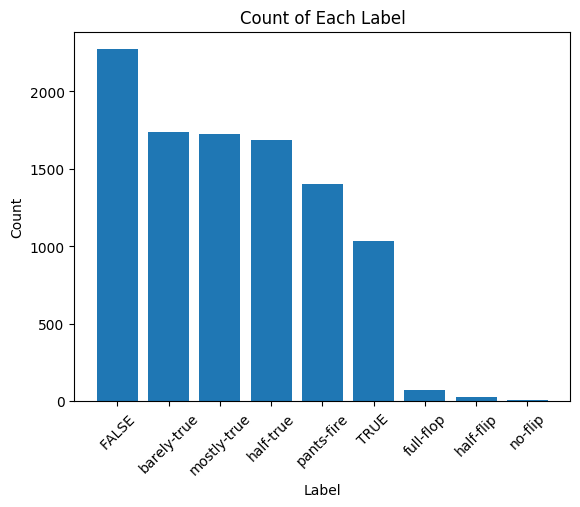

In [14]:
# Count of each label
label_counts = df_cleaned['Label'].value_counts()

# Bar graph
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Each Label')
plt.xticks(rotation=45)

In [15]:
label_counts

FALSE          2273
barely-true    1737
mostly-true    1722
half-true      1685
pants-fire     1402
TRUE           1036
full-flop        70
half-flip        27
no-flip           8
Name: Label, dtype: int64

The provided label distribution illustrates an imbalanced dataset, with certain classes having significantly more samples than others. The class "FALSE" appears most frequently with 2,273 occurrences, suggesting a substantial presence of false information. Other labels indicating varying degrees of truthfulness, such as "barely-true," "mostly-true," and "half-true," also have notable representation. Additionally, classes denoting extreme cases like "pants-fire" (indicating flagrant lies) and "TRUE" (verified facts) are moderately represented. However, classes such as "full-flop," "half-flip," and "no-flip" have significantly fewer samples, with counts of 70, 27, and 8 respectively. These classes likely represent more nuanced categories related to political assertions or claims, but their limited presence in the dataset suggests challenges in accurately modeling such scenarios. Addressing the class imbalance, particularly for the underrepresented classes, is crucial to ensure robust model performance across all truthfulness categories. Further investigation into the dynamics of truthfulness in media coverage, including temporal and source-based trends, can provide deeper insights into the dataset's characteristics and aid in developing effective modeling strategies.